# 1. Perkenalan

Nama : Gentur Herlambang

Batch : FTDS-017-RMT

Dataset : data harga tiket pesawat india

Objective : Melakukan expolrasi data mengenai hubungan antara feature-feature yang ada dengan harga ticket pesawat di india, dan membuat model yang mampu memprediksi harga ticket pesawat , ada beberapa model yang akan di bandingkan yaitu: Linier regration, Ridge, Decision Tree, KNN, dan Adaboost . Model yang terbaik akan di tuning dan di jadikan momdel untuk inferensi selanjutnya.

# 2. Import Libraries

Import Libararies yang akan di gunakan

In [1]:
import pandas as pd ## Import libararies yang akan di pakai
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import  OrdinalEncoder 
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import RandomizedSearchCV
import pickle
import json

KeyboardInterrupt: 

# 3.Data Loading

pertama menload data yang di dapat dari kaggle (https://www.kaggle.com/datasets/shubhambathwal/flight-price-prediction?select=Clean_Dataset.csv)

In [ ]:
df=pd.read_csv(r'K:\Hack8 Data Science\Phase 1\Milestone\Milestone 2\Clean_Dataset.csv') ##Menload data 

Mencek Bentuk data

In [ ]:
df.shape # cek bentuk data

(300153, 12)

melihat 10 data pertama dan tekahir

In [ ]:
df.head(10) # 10 data pertama

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
5,5,Vistara,UK-945,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.33,1,5955
6,6,Vistara,UK-927,Delhi,Morning,zero,Morning,Mumbai,Economy,2.08,1,6060
7,7,Vistara,UK-951,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.17,1,6060
8,8,GO_FIRST,G8-334,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.17,1,5954
9,9,GO_FIRST,G8-336,Delhi,Afternoon,zero,Evening,Mumbai,Economy,2.25,1,5954


In [ ]:
df.tail(10) # 10 data terakhir

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
300143,300143,Air_India,AI-440,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.42,49,51345
300144,300144,Air_India,AI-539,Chennai,Evening,one,Morning,Hyderabad,Business,18.92,49,51345
300145,300145,Air_India,AI-430,Chennai,Morning,one,Morning,Hyderabad,Business,23.08,49,51345
300146,300146,Air_India,AI-440,Chennai,Early_Morning,one,Morning,Hyderabad,Business,26.83,49,51345
300147,300147,Air_India,AI-569,Chennai,Early_Morning,one,Night,Hyderabad,Business,17.25,49,68739
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585
300152,300152,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,81585


Mengcopy data agar data asli aman

In [ ]:
ticket=df.copy() # copy data untuk evaluasi

In [ ]:
print(df['departure_time'].unique())

['Evening' 'Early_Morning' 'Morning' 'Afternoon' 'Night' 'Late_Night']


cek missing value

In [ ]:
ticket.isnull().sum() #cek missing value

Unnamed: 0          0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

tidak ada missing value

cek jenis data

In [ ]:
ticket.dtypes # cek jenis data

Unnamed: 0            int64
airline              object
flight               object
source_city          object
departure_time       object
stops                object
arrival_time         object
destination_city     object
class                object
duration            float64
days_left             int64
price                 int64
dtype: object

# 4. EDA

Pada bagian ini akan melakukan ekplorasi tentang feature data.

membuat copy unutk ekplorasi

In [ ]:
eda=df.copy() # eda copy

Melihat banyakanya jumlah penerbangan dari masing masing airline

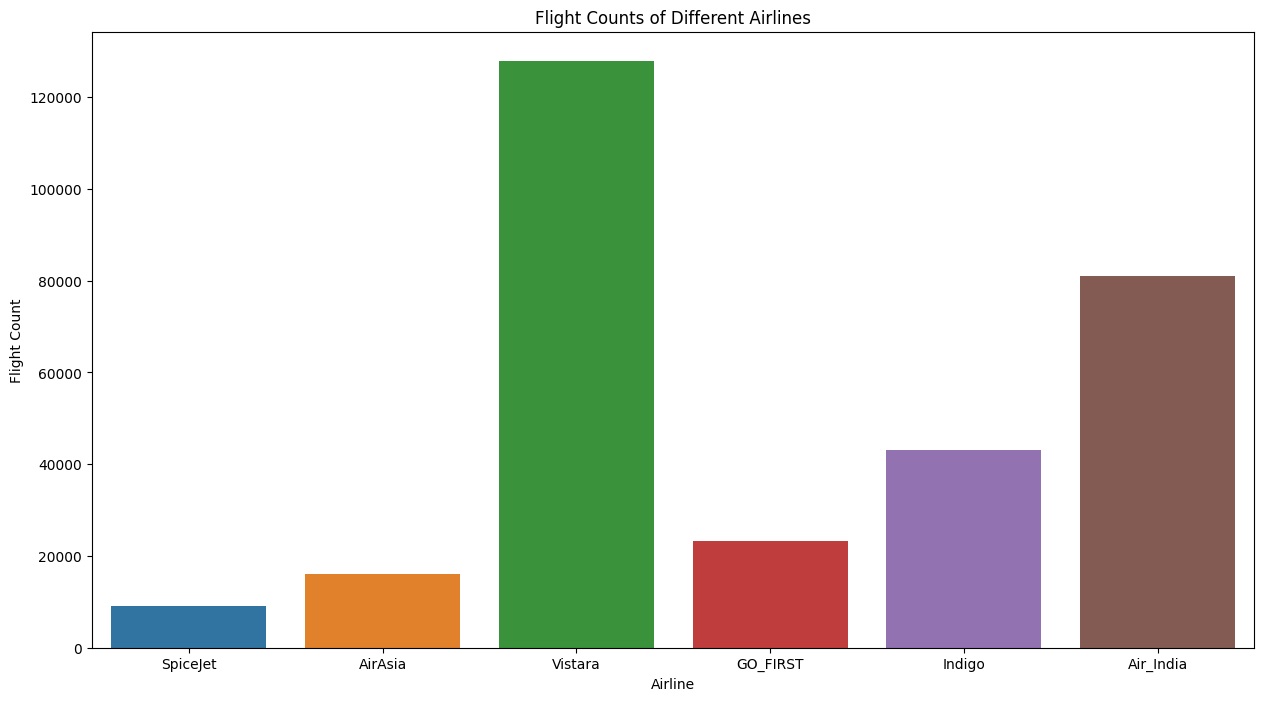

In [ ]:
merk = eda.groupby(['flight', 'airline'], as_index = False).count() # cek jumlah masing-masing airline

merk.airline.value_counts()
plt.figure(figsize = (15, 8))
sns.countplot(x = eda.airline)
plt.title('Flight Counts of Different Airlines')
plt.xlabel("Airline")
plt.ylabel("Flight Count")
plt.show();

Penrbangan india di pegagng oleh Vistara dan air india yang keduanya di atas 80 ribu penerbangan

C:\Users\parma\AppData\Local\Temp\ipykernel_15076\266632474.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  sns.barplot(x="airline" , y ="price" ,ci=False  , data=eda,)


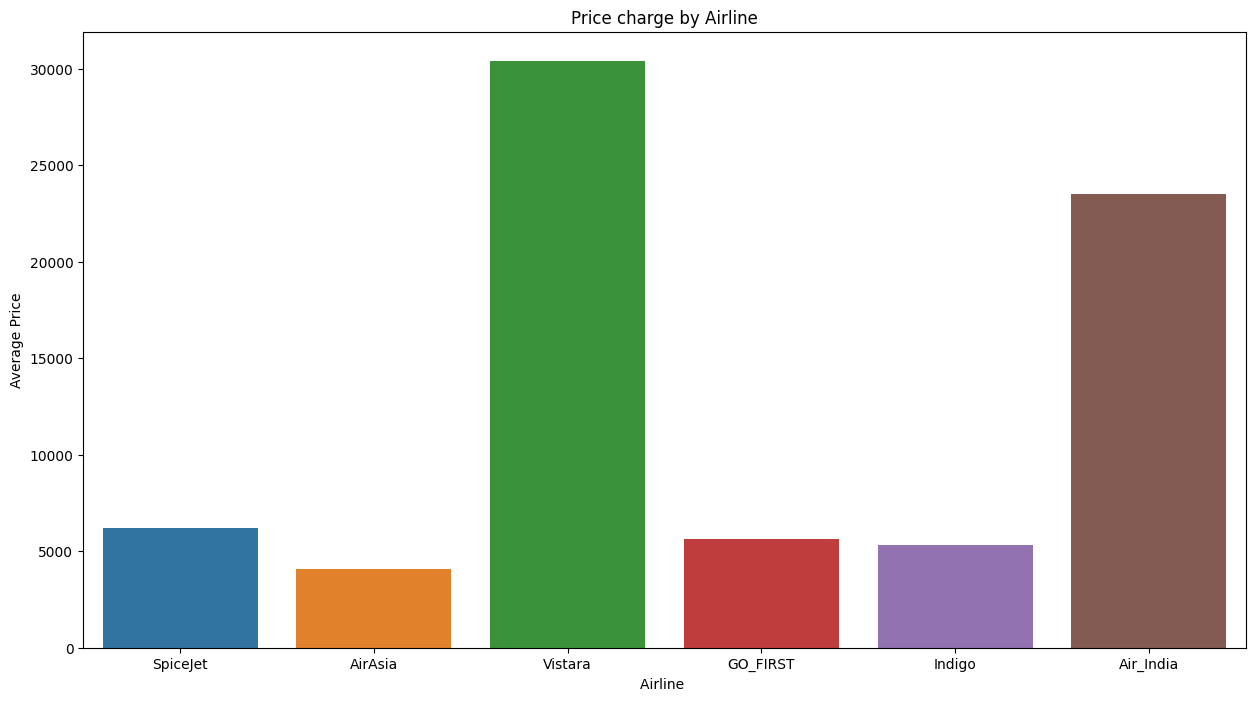

In [ ]:
plt.figure(figsize=(15,8)) # melihat harag rata-rata masing-masing maskapai
sns.barplot(x="airline" , y ="price" ,ci=False  , data=eda,)
plt.xlabel("Airline ")
plt.ylabel("Average Price")
plt.title("Price charge by Airline" )
plt.show()


Vistara dan Air India mendominasi dengan harga tiket rata-rata di atas 25000 sedangakan yang lainya hanya berkisar 5000

Melihata harga tiket berdasarkan kota keberangkatan

Text(0.5, 1.0, 'Airline prices based on Source City')

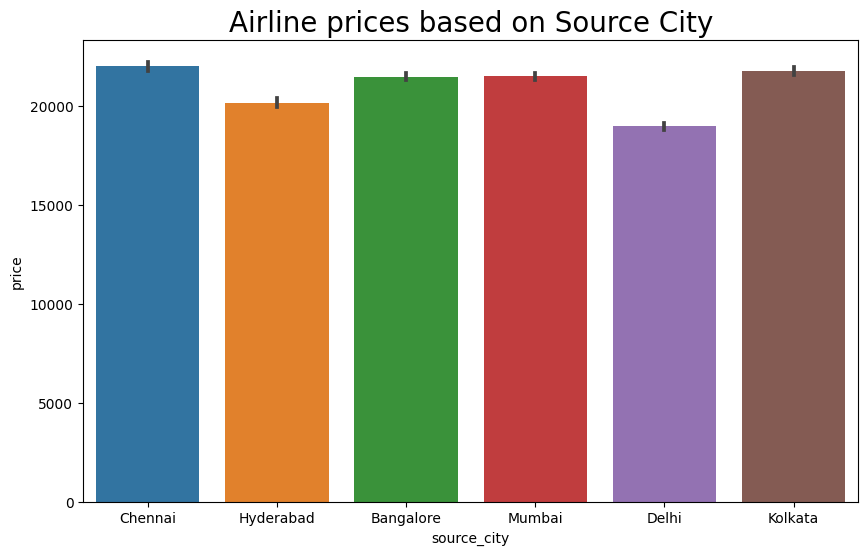

In [ ]:
plt.figure(figsize=(10,6)) # cek harga kota keberenagkatan
sns.barplot(x='source_city',y='price',data=eda.sort_values("price")).set_title('Airline prices based on Source City',fontsize=20)

Overall semuanya mirip ada di angka 20000

Melihat harga berdasarkan kota tujuan

Text(0.5, 1.0, 'Airline prices based on Destination City')

<Figure size 1000x600 with 0 Axes>

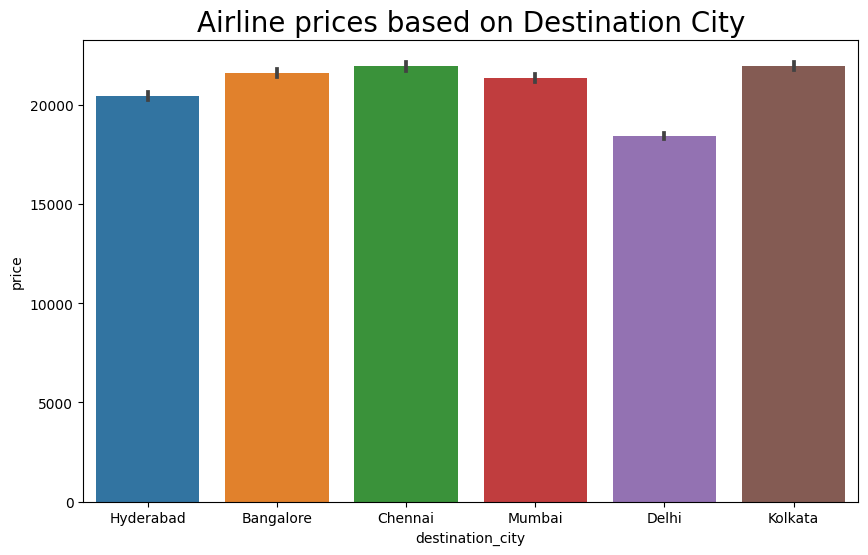

In [ ]:
plt.figure(figsize=(10,6)) # Melihat harga berdasarkan kota tujuan
plt.figure(figsize=(10,6))
sns.barplot(x='destination_city',y='price',data=eda.sort_values("price")).set_title('Airline prices based on Destination City',fontsize=20)

Overall semuanya mirip ada di angka 20000

Melihat harga tiket berdasarkan waktu kedatangan

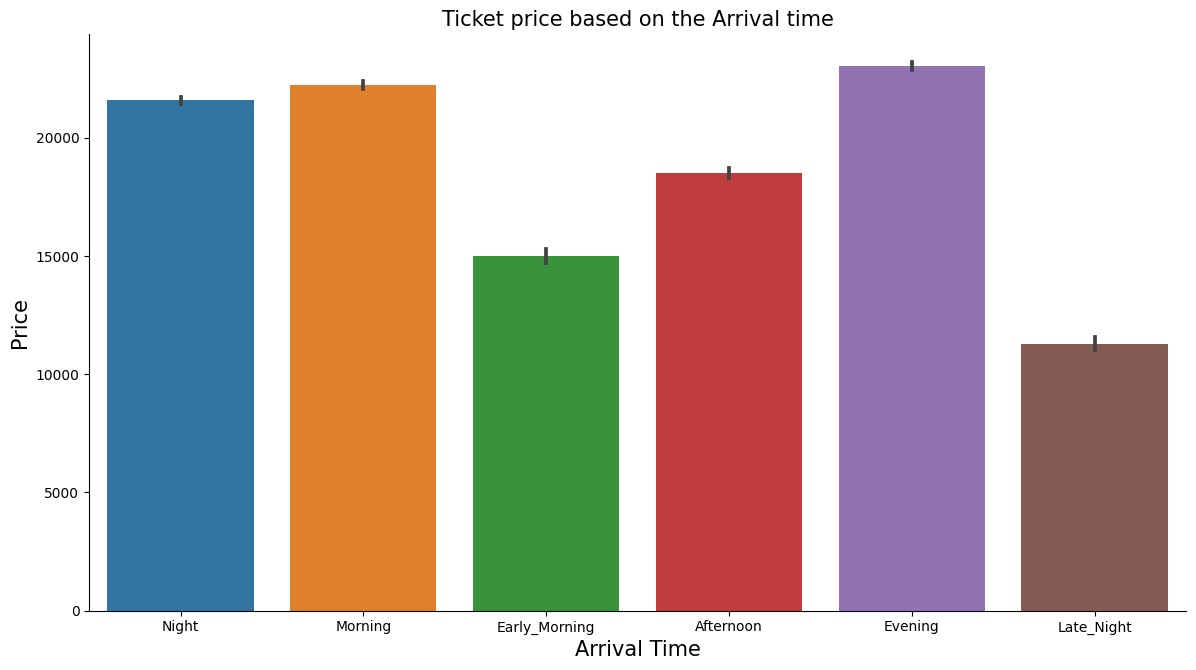

In [ ]:

sns.catplot(data=eda, kind="bar", x="arrival_time", y="price", height=6.5, aspect=12/6.5) #Melihat harga tiket berdasarkan waktu kedatangan
plt.title('Ticket price based on the Arrival time',fontsize=15)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Harga termahal berada pada kedatanagn siang hari dan termurah pada kedatangan malam hari

Melihat persebaran kelas ticket yang terjual

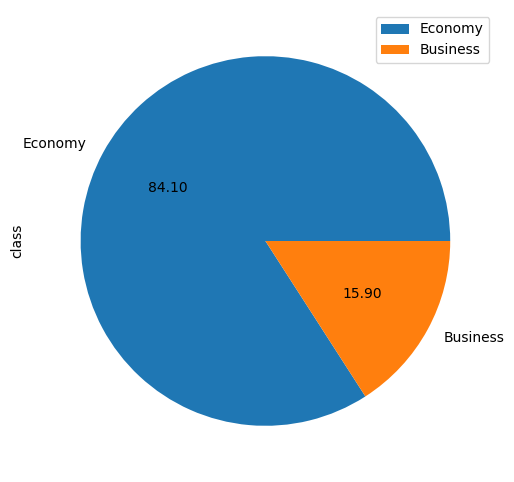

In [ ]:
harga = eda.groupby(['flight', 'airline','class'], as_index = False).count() #Melihat persebaran kelas ticket yang terjual
harga['class'].value_counts()
plt.figure(figsize = (10,6))
harga['class'].value_counts().plot(kind = 'pie', autopct = "%.2f")
plt.legend(['Economy','Business'])
plt.show()

Kelas ekonomi mendominasi dengan menguiasi hampir 85% pasar ticket pesawat india dan kelas bisnis hanya berkisar di 15%

Melihat Harga tiket Ekonomi vs Bisnis

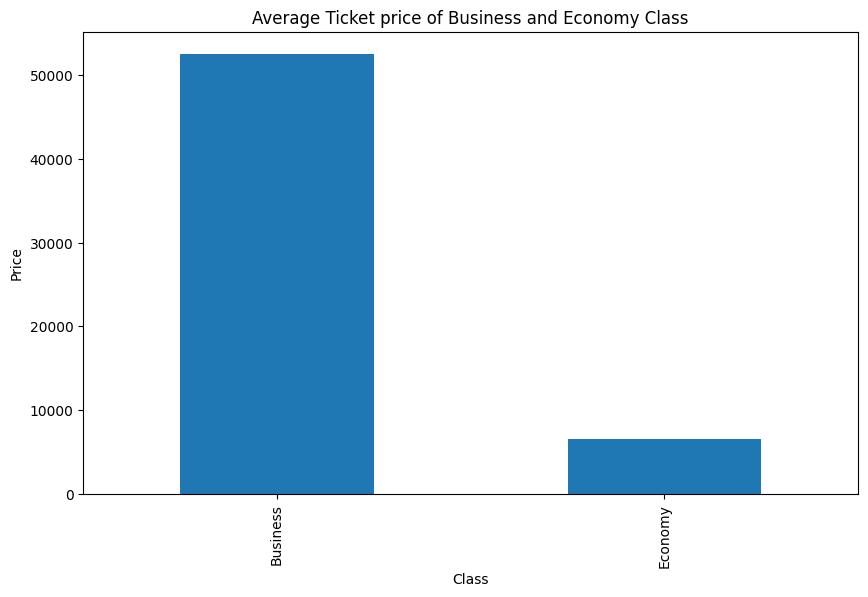

In [ ]:
Price = eda.groupby(['class'])['price'].mean() #Melihat Harga tiket Ekonomi vs Bisnis
plt.figure(figsize=(10,6))
Price.plot(kind='bar')
plt.title('Average Ticket price of Business and Economy Class')
plt.xlabel('Class')
plt.ylabel('Price')
plt.show()

Meskipun jumlah penjualanya sedikit teteapi harga rata-rata ticket bisnis hampir 10X nya harga tiket kelas ekonomi.

Melihat hungan durasi penerbangan dengan harga tiketnya

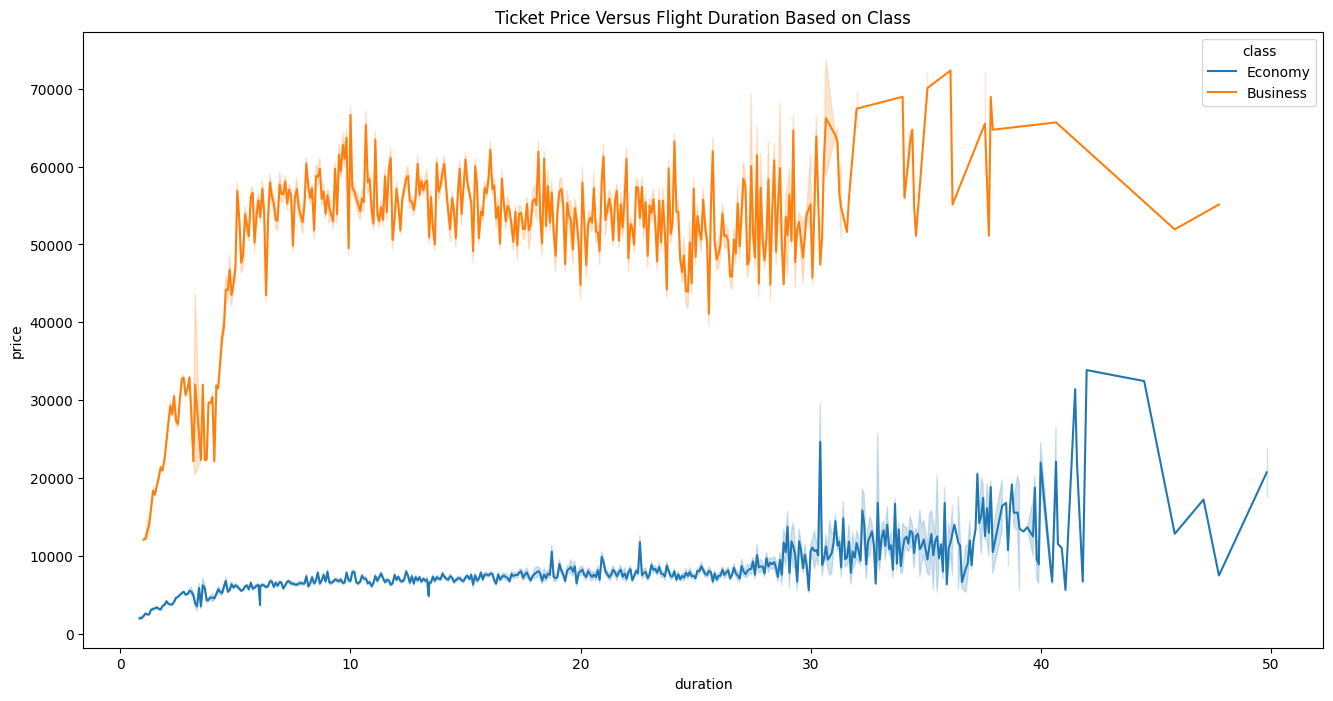

In [ ]:
plt.figure(figsize = (16, 8)) #Melihat hungan durasi penerbangan dengan harga tiketnya
sns.lineplot(data = eda , x = 'duration', y= 'price', hue = 'class')
plt.title('Ticket Price Versus Flight Duration Based on Class')
plt.show()

Untuk kelas ekonomi harga tiket baru berubah saat durasi penerbanagan sudah di atas 30 jam , sedangakan untuk kelas bisnis perubahan mulai terlihat dari durasi di atas 6 jam.

Terakhir akan melihat anatara waktu pembelian dengan harga

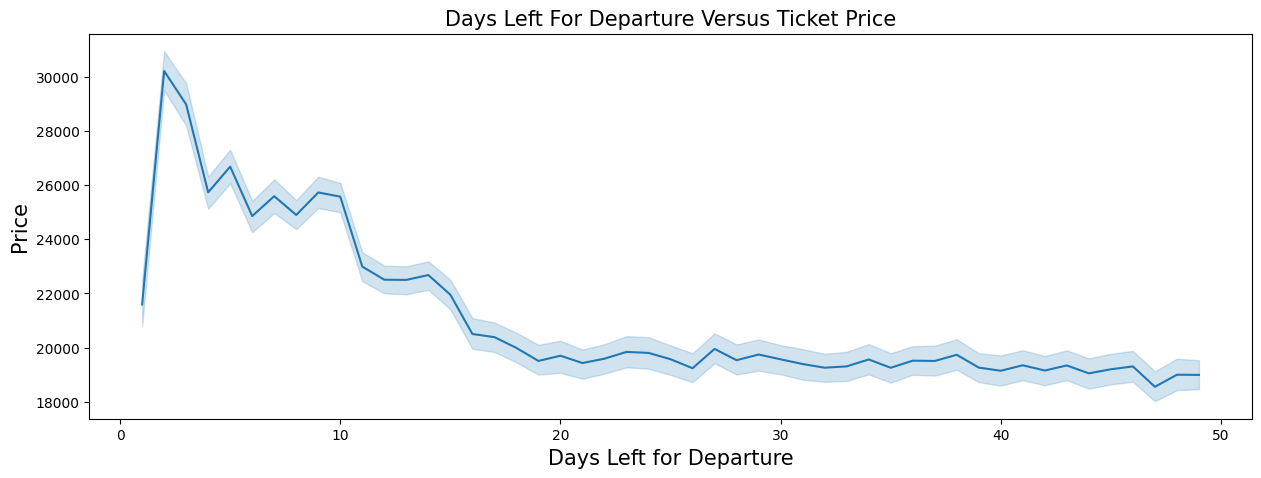

In [ ]:
plt.figure(figsize=(15,5)) # melihat anatara waktu pembelian dnegan harga
sns.lineplot(data=eda , x='days_left' ,y='price')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=15)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

Harga tiket termahal di beli terdapat apda rentan waktu 3 hari sebelum keberangkatan dan semakin lama harag tiket di beli maka smeakin murah , akan tetapi terjadi penuruan yang lumayan signifikan pada pembelian tiket hari 1 dan 2 sebelum keberangkatan.

# 5. Data Preprocesing

Mendrop fitur yang dirasa tidak penting 

In [ ]:
ticket = ticket.drop(['Unnamed: 0','flight'], axis=1) # mendrop fitur yang di rasa kurang penting 


Memilih kol;om fitur dan  target

In [ ]:
# Memilih kolom untuk dijadikan fitur dan target
X = ticket.drop(["price"], axis=1) # List fitur
y = ticket["price"] # List target

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=36, stratify=None) # Split dengan ukuran 70% train dan 30% test
print("Train size : ", X_train.shape) # Ukuran dimensi Train set
print("Test size : ", X_test.shape) # Ukuran dimensi Test set

Train size :  (210107, 9)
Test size :  (90046, 9)


Membagi kolom numeric dan categorical

In [ ]:

num_columns = X_train.select_dtypes(include=np.number).columns.tolist() #Membagi kolom numeric dan categorical
cat_columns = X_train.select_dtypes(include=['object']).columns.tolist()

print('Num Columns : ', num_columns)
print('Cat Columns : ', cat_columns)

Num Columns :  ['duration', 'days_left']
Cat Columns :  ['airline', 'source_city', 'departure_time', 'stops', 'arrival_time', 'destination_city', 'class']


Memasukan kolom numeric dan  categoriucal train test 

In [ ]:
#Memasukan kolom numeric dan  categoriucal train test 
X_train_num = X_train[num_columns]
X_test_num = X_test[num_columns]

X_train_cat = X_train[cat_columns]
X_test_cat = X_test[cat_columns]
X_train_num

,duration,days_left
186776,30.75,44
66682,14.08,30
276434,27.25,34
116187,25.50,10
17019,3.00,35
...,...,...
27436,13.83,42
222458,28.42,11
138401,10.67,22
183208,9.58,22


## Numerical data

membuat function unutk melihat normalisasi data

In [ ]:
def central_plot(df,variable): ## membuat variabel central tendencyes
    print(variable) 
    print ("median:",df[variable].median())
    print ("mean:",df [variable].mean())
    print ("mode:",df [variable].mode()[0])
    print ("skew:",df [variable].skew())
    plt.figure(figsize=(15, 5))
    plt.subplot(1, 2, 1)
    sns.histplot(df[variable], kde=True, bins=30)
    plt.title('central tendencies')
    

Cek normalisasi durasi

duration
median: 11.25
mean: 12.20969344191293
mode: 2.17
skew: 0.6064843896141842


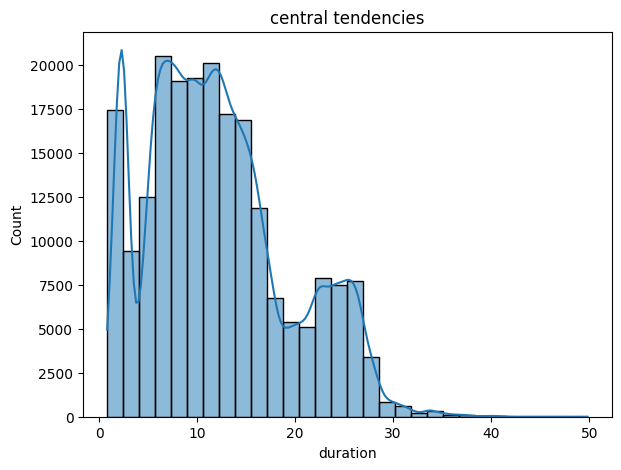

In [ ]:
central_plot(X_train_num, 'duration') # Cek normalisasi durasi

Agak sedikit right skew dengan nilai skew 0.6

Cek normalisasi waktu pembelian

days_left
median: 26.0
mean: 25.9803433488651
mode: 18
skew: -0.033079371234202744


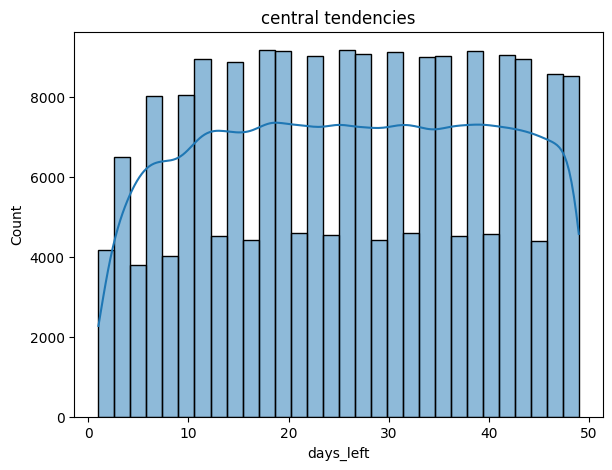

In [ ]:
central_plot(X_train_num, 'days_left') #Cek normalisasi waktu pembelian

terdistribusi normal

Melakukan capping untuk outlier

In [ ]:
windsoriser = Winsorizer(capping_method='iqr', tail='both', fold=1.5, variables=num_columns) #Melakukan capping untuk outlier

windsoriser.fit(X_train_num)
X_train_num = windsoriser.transform(X_train_num)
X_train_num

,duration,days_left
186776,30.30,44
66682,14.08,30
276434,27.25,34
116187,25.50,10
17019,3.00,35
...,...,...
27436,13.83,42
222458,28.42,11
138401,10.67,22
183208,9.58,22


Skaling untuk fitur numeric dengan standart scaler

In [ ]:
standard_scaler = StandardScaler() # scaling
standard_scaler.fit(X_train_num)

X_train_scaled = standard_scaler.transform(X_train_num)
X_test_scaled = standard_scaler.transform(X_test_num)
X_train_scaled



array([[ 2.53822053,  1.32923498],
       [ 0.26502473,  0.29651332],
       [ 2.11077002,  0.59157665],
       ...,
       [-0.21287895, -0.29361334],
       [-0.36563996, -0.29361334],
       [ 0.66304421, -1.47386667]])

## Categorical data

Melakukan encoding dengan Ordinal encoder , tidak dengan oine hot encoder karena saat melakukan one hot encoder membuat kolom terlalu banyak dan terjadi error

In [ ]:
oe=OrdinalEncoder() # Encoding
oe.fit(X_train_cat)

X_train_cat_enc=oe.transform(X_train_cat)
X_test_cat_enc=oe.transform(X_test_cat)

## Concate data

In [ ]:
X_train_final = np.concatenate([X_train_scaled,X_train_cat_enc], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_cat_enc], axis=1)


In [ ]:
X_train_final_df = pd.DataFrame(X_train_final, columns=[num_columns + cat_columns])
X_train_final_df

,duration,days_left,airline,source_city,departure_time,stops,arrival_time,destination_city,class
0,2.538221,1.329235,5.0,1.0,4.0,0.0,2.0,2.0,1.0
1,0.265025,0.296513,5.0,5.0,2.0,0.0,4.0,4.0,1.0
2,2.110770,0.591577,1.0,3.0,1.0,0.0,4.0,2.0,0.0
3,1.865512,-1.178803,5.0,0.0,2.0,0.0,2.0,1.0,1.0
4,-1.287812,0.665342,3.0,2.0,0.0,2.0,2.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
210102,0.229988,1.181703,1.0,2.0,2.0,0.0,4.0,4.0,1.0
210103,2.274743,-1.105038,1.0,2.0,2.0,0.0,5.0,1.0,0.0
210104,-0.212879,-0.293613,3.0,4.0,4.0,0.0,5.0,0.0,1.0
210105,-0.365640,-0.293613,3.0,1.0,1.0,0.0,2.0,2.0,1.0


# 6. Model Defination

Pendifinisan model yang akan di gunakan

In [ ]:
# Defining Logistic Regression Model
lin_model = LinearRegression()
# Defining Ridge model
rid_model= Ridge()
# Defining Decision Tree Regresor Model
dt_model = DecisionTreeRegressor(random_state=36)
# Defining KNN Regresor Model
knn_model = KNeighborsRegressor(n_neighbors=5)
# Defining AdaBoost Regresor Model
ada_model =  AdaBoostRegressor()

# 7. Model Training

Melakuakn trainig model 

In [ ]:
#training Logistic Regression Model
lin_model.fit(X_train_final_df,y_train)
#training Ridge model
rid_model.fit(X_train_final_df,y_train)
#training Decision Tree Regresor Model
dt_model.fit(X_train_final_df,y_train)
#training KNN Regresor Model
knn_model.fit(X_train_final_df,y_train)
#training AdaBoost Regresor Model
ada_model.fit(X_train_final_df,y_train)

AdaBoostRegressor()

# 8. Model Evaluation

Evaluasi model akan menggunakan parameter Mean Aboslute Error di mana ini memberikan nilai error maksimal anatara model prediksi dengan data aslinya

 evaluasi Linier Regration

In [ ]:
y_pred_train = lin_model.predict(X_train_final) # evaluasi Linier Regration
y_pred_test = lin_model.predict(X_test_final)
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  4646.664613705909
MAE - Test Set  :  4634.869027659685


Linier Regration good fit dengan nilai mae ada di sekitar 4600

evaluasi Ridge model

In [ ]:
y_pred_train = rid_model.predict(X_train_final) # evaluasi Ridge model
y_pred_test = rid_model.predict(X_test_final)
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  4646.712986089674
MAE - Test Set  :  4634.920364028227


Good fit,Sama seperti Linier Regration ridge model memiliki MAE train-test di 4600

Decision tree Model

In [ ]:
y_pred_train = dt_model.predict(X_train_final) # evaluasi Decision tree Model
y_pred_test = dt_model.predict(X_test_final)
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  51.62842266083473
MAE - Test Set  :  1186.0107824519318


Decision Tree model bisa dikatakan Overfit , karena niali test dan tarin nya berbeda lumayan jauh , tetapi memiliki niali MAE terendah di 1186

valuasi KNN model

In [ ]:
y_pred_train = knn_model.predict(X_train_final)  # evaluasi KNN model
y_pred_test = knn_model.predict(X_test_final)
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  1484.354377531448
MAE - Test Set  :  1901.7306598849477


Goodfit, KNN model juga cukup bagus dengan nilai MAE ada di 1900

evaluasi Adaboost Model

In [ ]:
y_pred_train = ada_model.predict(X_train_final) # evaluasi Adaboost Model
y_pred_test = ada_model.predict(X_test_final)
print('MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print('MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

MAE - Train Set :  4169.7259705121805
MAE - Test Set  :  4177.342731147823


Good fit ,Adaboost model memiliki performa yang mirip dengan Linier Regartion model.

Setelah melakukan evaluasi model yang akan di lakukan improvement adalah decision tree

# 9.Model Imporvement

Pertama kita akan melakukan hyperparameter tuning dengan cv random search

In [ ]:
# menetiukan parameter 
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(x) for x in np.linspace(10, 1000, 10)]
min_samples_split = [1,2, 5]
min_samples_leaf = [1, 2, 4, 6]
random_grid = {'max_features':max_features,
               'max_depth':max_depth,
               'min_samples_split':min_samples_split,
               'min_samples_leaf':min_samples_leaf,
               'criterion':['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}
             
random_grid

{'max_features': ['auto', 'sqrt', 'log2'],
 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000],
 'min_samples_split': [1, 2, 5],
 'min_samples_leaf': [1, 2, 4, 6],
 'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson']}

Mencari best paramn

In [ ]:
rf_randomcv = RandomizedSearchCV(estimator=dt_model, # mencari param terbaik
                                 param_distributions=random_grid,
                                 n_iter=50,
                                 cv=5, 
                                 random_state=46, 
                                 n_jobs=-1,)
rf_randomcv.fit(X_train_final, y_train)
print('best params:', rf_randomcv.best_params_)

Memasukan parameter terbaik kedalam model

In [ ]:
dt_final=DecisionTreeRegressor( max_depth= 560 ,min_samples_split=5 ,min_samples_leaf=2 , max_features= 'auto') # model evaluation dengan improve model
dt_final.fit(X_train_final_df,y_train)
y_pred_train = dt_final.predict(X_train_final)
y_pred_test = dt_final.predict(X_test_final)
print(' MAE - Train Set : ', mean_absolute_error(y_train, y_pred_train)) 
print(' MAE - Test Set  : ', mean_absolute_error(y_test, y_pred_test))

c:\Users\parma\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\tree\_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


 MAE - Train Set :  538.1032816612488
 MAE - Test Set  :  1159.1872337471957


di dapat nilai test MAE turun menjadi 1159

# 10.Infarance

Deployment model unutk di coba

In [ ]:
# Model saving
with open('dt_final.pkl', 'wb') as file_1:
  pickle.dump(dt_final, file_1)

with open('standard_scaler.pkl', 'wb') as file_2:
  pickle.dump(standard_scaler, file_2)

with open('oe.pkl', 'wb') as file_3:
  pickle.dump(oe, file_3)

with open('list_num_cols.txt', 'w') as file_4:
  json.dump(num_columns, file_4)

with open('list_cat_cols.txt', 'w') as file_5:
  json.dump(cat_columns, file_5)

Untuk mencoba model (https://huggingface.co/spaces/Gentur/Airplane_prediction)

# 11.Evaluation

vistara dan air india mendominasi jumlah penerbangan di India dengan jumlah penerbangan kedua maskapai tersebut di atas 80 ribu , sedangakan kompetitor terdekatnya adalah Indigo dengan 40 ribu penerbanagan.Sedangakan dari hargarata-rata masing-masing maskapai Vistara dan Air india mendominasi dengan harga tiket rata-rata di atas 25 ribu sedanagakan yang lainya harga tiket rata-ratanya ada di skeitar 5000.Untuk harga rata-rata keberangakatan dan tujuan tidak terlalu ada perbedaaan semua berada di angaka 20000. Untuk harga tiket paling murah berada di waktu tengah malam dan tertmahal berada pada pagi dan siang.   

Kelas ekonomi mendominasi dengan menguiasi hampir 85% pasar ticket pesawat india dan kelas bisnis hanya berkisar di 15%.Meskipun jumlah penjualanya sedikit teteapi harga rata-rata ticket bisnis hampir 10X nya harga tiket kelas ekonomi.selanjutanya untuk hubungan anatara durasi dengan harga ticket Untuk kelas ekonomi harga tiket baru berubah saat durasi penerbanagan sudah di atas 30 jam , sedangakan untuk kelas bisnis perubahan mulai terlihat dari durasi di atas 6 jam. Sedangkan unutk hubungan anatara harga tiket dengan waktu pembelian Harga tiket termahal di beli terdapat apda rentan waktu 3 hari sebelum keberangkatan dan semakin lama harag tiket di beli maka smeakin murah , akan tetapi terjadi penuruan yang lumayan signifikan pada pembelian tiket hari 1 dan 2 sebelum keberangkatan.  


Unutk evaluasi model menggunakan score MAE , dan dari model : Linier Regration , ridge, Decision Tree, KNN, dan Adaaboost didapatkan model terbaik adalah Decisoin tree denagn MAE 1186 dan setelah di lakukan Imporvement MAE nya berada di 1159

Beberapa Takeaway dari EDA :
- Lokasi keberangkatan dan tujuan tidak meempengaruhi harga ticket terlalu besar.
- Harga ticket termurah di dapat pada penerbangan yang sampai pada malam hari .
- Unutuk mendapatkan harga tiket termurah dapat di beli jau0juah hari atau 1-2 hari sebelum keberangkatan.


Masukan unutk model improvement:
- pecah data menjadi bebrapa bagian karena size data cukup besar membuat pengolahan data menjadi agak sulit.

Kelebihan dan kekurangan model yang di gunakan 
kelebihan :  
- Tahan outlier 
- versetile

Kekurangan : 
- Overfit

